# SPOT Kriging in 6 Dimensions: Nyström Approximation vs. Exact (Rosenbrock Function)

This notebook demonstrates how to use the `Spot` class from `spotpython` with and without the Nyström approximation for Kriging surrogates on the 6-dimensional Rosenbrock function.

We use a maximum of 100 function evaluations.

In [1]:
import numpy as np
from spotpython.fun.objectivefunctions import Analytical
from spotpython.spot import Spot
from spotpython.utils.init import fun_control_init, design_control_init, surrogate_control_init

Seed set to 123


## Define the  Rosenbrock Function

In [2]:
# do not change, these are given by the organizers
dim = 2
lower = np.full(dim, -2)
upper = np.full(dim, 2)
fun = Analytical().fun_rosenbrock
fun_evals = 100

## Set up SPOT Controls

## Aquisition Random and Regression and y as Infill Criterion

In [3]:
init_size = 6
use_nystrom = False
method = "regression"
infill_criterion = "y"
tolerance_x = 1e-3 # minimum distance in x for accepting new points
seed = 321
max_surrogate_points = 500
# min_Lambda = -6
# max_Lambda = 1
min_theta = -3
max_theta = 2
isotropic = False
optim_p = False
# min_success_rate = 0.10 #  percent
acquisition_failure_strategy = "random"
kernel = "matern"
kernel_params = {"nu": 1.5}

Seed set to 321


Moving TENSORBOARD_PATH: runs/ to TENSORBOARD_PATH_OLD: runs_OLD/runs_2025_11_06_14_45_04_0
Created spot_tensorboard_path: runs/spot_logs/000_p040025_2025-11-06_14-45-04 for SummaryWriter()
spotpython tuning: 3.7710248303502314 [#---------] 7.00%. Success rate: 100.00% 
spotpython tuning: 3.7710248303502314 [#---------] 8.00%. Success rate: 50.00% 
spotpython tuning: 3.7710248303502314 [#---------] 9.00%. Success rate: 33.33% 
spotpython tuning: 3.7710248303502314 [#---------] 10.00%. Success rate: 25.00% 
spotpython tuning: 3.730812201937712 [#---------] 11.00%. Success rate: 40.00% 
spotpython tuning: 3.730812201937712 [#---------] 12.00%. Success rate: 33.33% 
spotpython tuning: 3.7300886525877974 [#---------] 13.00%. Success rate: 42.86% 
Using spacefilling design as fallback.
spotpython tuning: 3.7300886525877974 [#---------] 14.00%. Success rate: 37.50% 
Using spacefilling design as fallback.
spotpython tuning: 3.7300886525877974 [##--------] 15.00%. Success rate: 33.33% 
spotpyt

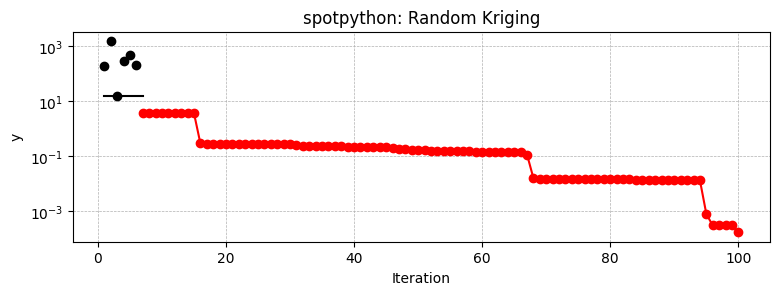

In [4]:
fun_control = fun_control_init(
    lower=lower,
    upper=upper,
    fun_evals=fun_evals,
    max_time=60,
    seed=seed,
    show_progress=True,
    infill_criterion=infill_criterion,
    # min_success_rate=min_success_rate,
    tolerance_x=tolerance_x,
    TENSORBOARD_CLEAN=True,
    tensorboard_log=True,
    acquisition_failure_strategy=acquisition_failure_strategy,
)
design_control = design_control_init(init_size=init_size)
# surrogate_control_exact = surrogate_control_init(use_nystrom=use_nystrom, 
#                                                  optim_p=optim_p,
#                                                  method=method, max_surrogate_points=max_surrogate_points, min_Lambda=min_Lambda, max_Lambda=max_Lambda, min_theta=min_theta, max_theta=max_theta, isotropic=isotropic,
#                                                  kernel=kernel, kernel_params=kernel_params)
from spotpython.surrogate.kernels import CustomMatern
surrogate_control_exact = surrogate_control_init(
    kernel=CustomMatern(length_scale=1.0, nu=2.5),
    kernel_params={"nu": 2.5},
    min_theta=min_theta, max_theta=max_theta,
    max_surrogate_points=max_surrogate_points
)

spot_exact_random = Spot(
        fun=fun,
        fun_control=fun_control,
        design_control=design_control,
        surrogate_control=surrogate_control_exact
    )
spot_exact_random.run()
spot_exact_random.plot_progress(log_y=True, title="spotpython: Random Kriging")

## Aquisition MM and Regression and y as Infill Criterion

In [5]:
acquisition_failure_strategy = "mm"

Seed set to 321


Created spot_tensorboard_path: runs/spot_logs/000_p040025_2025-11-06_14-45-58 for SummaryWriter()
spotpython tuning: 3.7710248303502314 [#---------] 7.00%. Success rate: 100.00% 
spotpython tuning: 3.7710248303502314 [#---------] 8.00%. Success rate: 50.00% 
spotpython tuning: 3.7710248303502314 [#---------] 9.00%. Success rate: 33.33% 
spotpython tuning: 3.7710248303502314 [#---------] 10.00%. Success rate: 25.00% 
spotpython tuning: 3.730812201937712 [#---------] 11.00%. Success rate: 40.00% 
spotpython tuning: 3.730812201937712 [#---------] 12.00%. Success rate: 33.33% 
spotpython tuning: 3.7300886525877974 [#---------] 13.00%. Success rate: 42.86% 
Using mmphi minimizing point as fallback.
spotpython tuning: 3.7300886525877974 [#---------] 14.00%. Success rate: 37.50% 
spotpython tuning: 2.887420121446559 [##--------] 15.00%. Success rate: 44.44% 
spotpython tuning: 2.887420121446559 [##--------] 16.00%. Success rate: 40.00% 
spotpython tuning: 2.887420121446559 [##--------] 17.00%

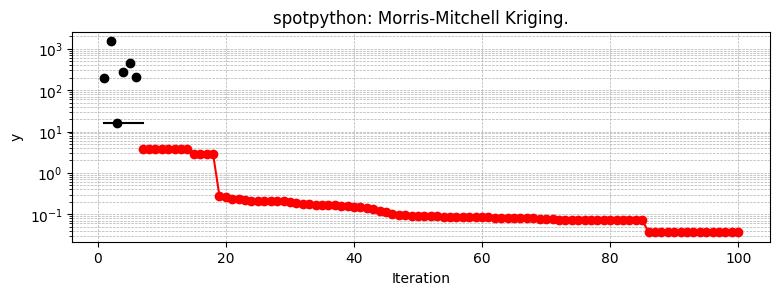

In [6]:
fun_control = fun_control_init(
    lower=lower,
    upper=upper,
    fun_evals=fun_evals,
    max_time=60,
    seed=seed,
    show_progress=True,
    infill_criterion=infill_criterion,
    # min_success_rate=min_success_rate,
    tolerance_x=tolerance_x,
    TENSORBOARD_CLEAN=False,
    tensorboard_log=True,
    acquisition_failure_strategy=acquisition_failure_strategy,
)
# design_control = design_control_init(init_size=init_size)
# surrogate_control_exact = surrogate_control_init(use_nystrom=use_nystrom, optim_p=optim_p, method=method, max_surrogate_points=max_surrogate_points, min_Lambda=min_Lambda, max_Lambda=max_Lambda, min_theta=min_theta, max_theta=max_theta, isotropic=isotropic, kernel=kernel, kernel_params=kernel_params)
spot_exact_mm = Spot(
    fun=fun,
    fun_control=fun_control,
    design_control=design_control,
    surrogate_control=surrogate_control_exact
)
spot_exact_mm.run()
spot_exact_mm.plot_progress(log_y=True, title="spotpython: Morris-Mitchell Kriging.")

## Compare Minimum Found

In [7]:
print(f"[2D] spotpython Kriging Random:\n min y = {spot_exact_random.min_y:.4f} at x = {spot_exact_random.min_X}")
print(f"[2D] spotpython Kriging Morris-Mitchell:\n min y = {spot_exact_mm.min_y:.4f} at x = {spot_exact_mm.min_X}")

[2D] spotpython Kriging Random:
 min y = 0.0002 at x = [0.98877334 0.9769628 ]
[2D] spotpython Kriging Morris-Mitchell:
 min y = 0.0369 at x = [1.15859378 1.3314996 ]


x0:  100.0
x1:  10.01385742173846


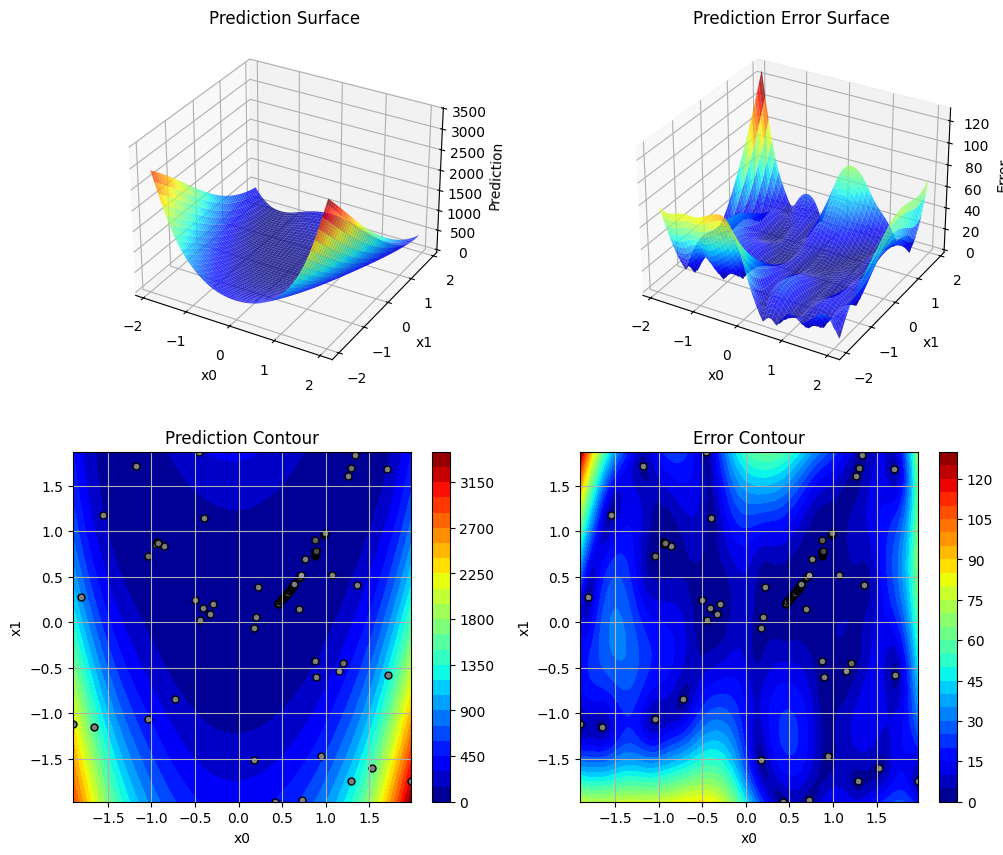

In [8]:
spot_exact_random.plot_important_hyperparameter_contour(max_imp=3)


x0:  100.0
x1:  20.067818370688904


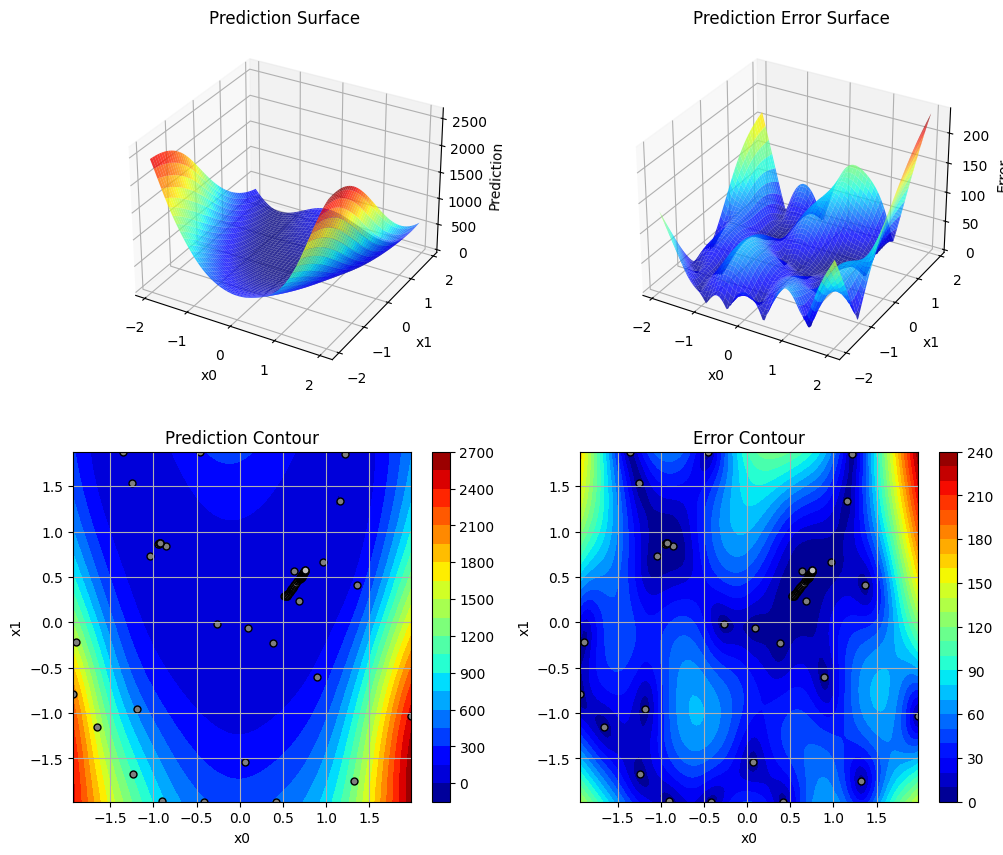

In [9]:
spot_exact_mm.plot_important_hyperparameter_contour(max_imp=3)

In [10]:
import numpy as np
from spotpython.spot import Spot
from spotpython.fun import Analytical
from spotpython.utils.init import fun_control_init
nn = 3
fun_sphere = Analytical().fun_sphere
fun_control = fun_control_init(
        lower = np.array([-1, -1]),
        upper = np.array([1, 1]),
        n_points=nn,
        )
S = Spot(
    fun=fun_sphere,
    fun_control=fun_control,
    )
S.X = S.design.scipy_lhd(
    S.design_control["init_size"], lower=S.lower, upper=S.upper
)
print(f"S.X: {S.X}")
S.y = S.fun(S.X)
print(f"S.y: {S.y}")
S.fit_surrogate()
x = np.array([0.5, 0.5])
y_infill = S.infill(x)
print(f"y_infill: {y_infill}")
assert np.isscalar(y_infill) or y_infill.shape == (1,)

Seed set to 123


S.X: [[ 0.86352963  0.7892358 ]
 [-0.24407197 -0.83687436]
 [ 0.36481882  0.8375811 ]
 [ 0.415331    0.54468512]
 [-0.56395091 -0.77797854]
 [-0.90259409 -0.04899292]
 [-0.16484832  0.35724741]
 [ 0.05170659  0.07401196]
 [-0.78548145 -0.44638164]
 [ 0.64017497 -0.30363301]]
S.y: [1.36857656 0.75992983 0.83463487 0.46918172 0.92329124 0.8170764
 0.15480068 0.00815134 0.81623768 0.502017  ]
y_infill: [0.50052583]


In [11]:
import numpy as np
from spotpython.spot import Spot
from spotpython.fun import Analytical
from spotpython.utils.init import fun_control_init
nn = 3
fun_sphere = Analytical().fun_sphere
fun_control = fun_control_init(
        lower = np.array([-1, -1]),
        upper = np.array([1, 1]),
        n_points=nn,
        )
S = Spot(
    fun=fun_sphere,
    fun_control=fun_control,
    )
z00 = np.array([[1, 2, 3, 4], [5, 6, 7, 8]])
S.var_type = ["float", "int", "int", "float"]
S.process_z00(z00)

Seed set to 123


[np.float64(3.0), np.int64(2), np.int64(3), np.float64(6.0)]